<a href="https://colab.research.google.com/github/sebachamorrov/data-science-mitic/blob/main/CORE3_Ingenieria_de_caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from google.colab import drive
drive.mount('/content/drive')

ruta_archivo = '/content/drive/My Drive/Colab Notebooks/Dataset/titanic.csv'

import pandas as pd
df = pd.read_csv(ruta_archivo)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tamaño y forma del dataframe
df.shape  # Muestra la cantidad de filas y columnas en el dataframe.

(891, 12)

In [81]:
# Información general del dataframe
df.info()  # Muestra el tipo de datos, el número de valores no nulos y el uso de memoria de cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
# Estadísticas descriptivas de las columnas numéricas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
# Estadísticas descriptivas de columnas categóricas
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [84]:
# Comprobación de valores nulos
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [85]:
# Identificación de valores duplicados
df.duplicated().sum()

0

In [86]:
# Distribución de tipos de datos
df.dtypes.value_counts()

,count
int64,5
object,5
float64,2


In [87]:
# Distribución de valores en columnas categóricas
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

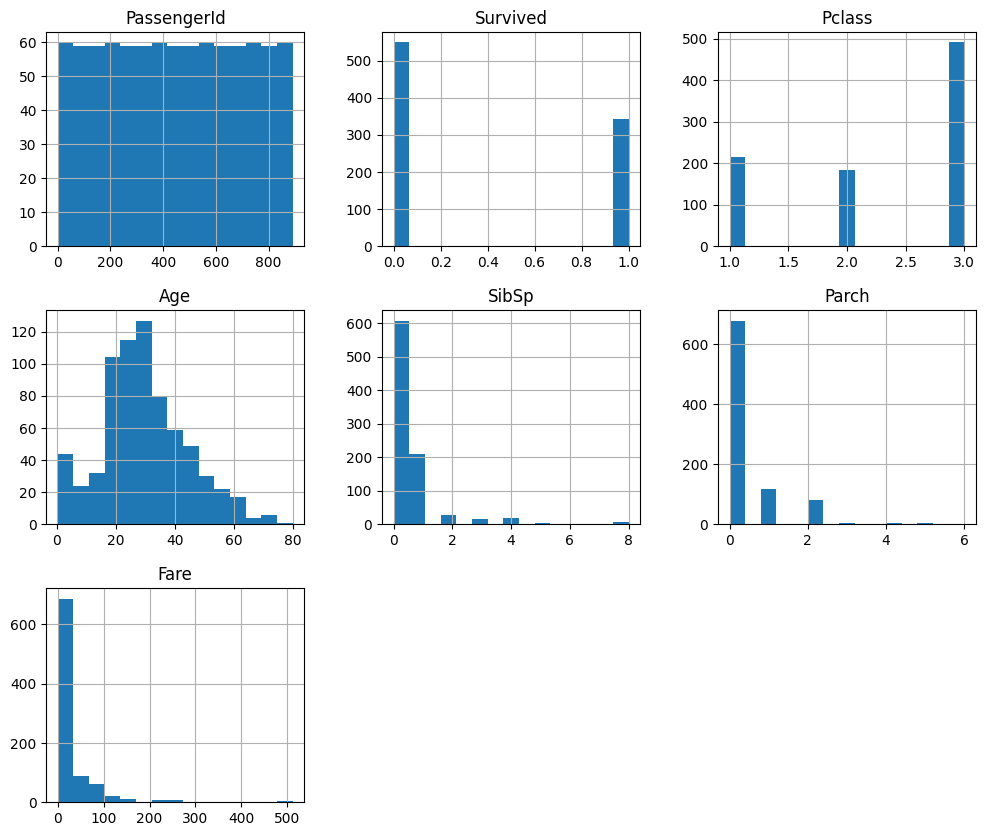

In [88]:
# Visualización de distribuciones numéricas
df.hist(figsize=(12, 10), bins=15)

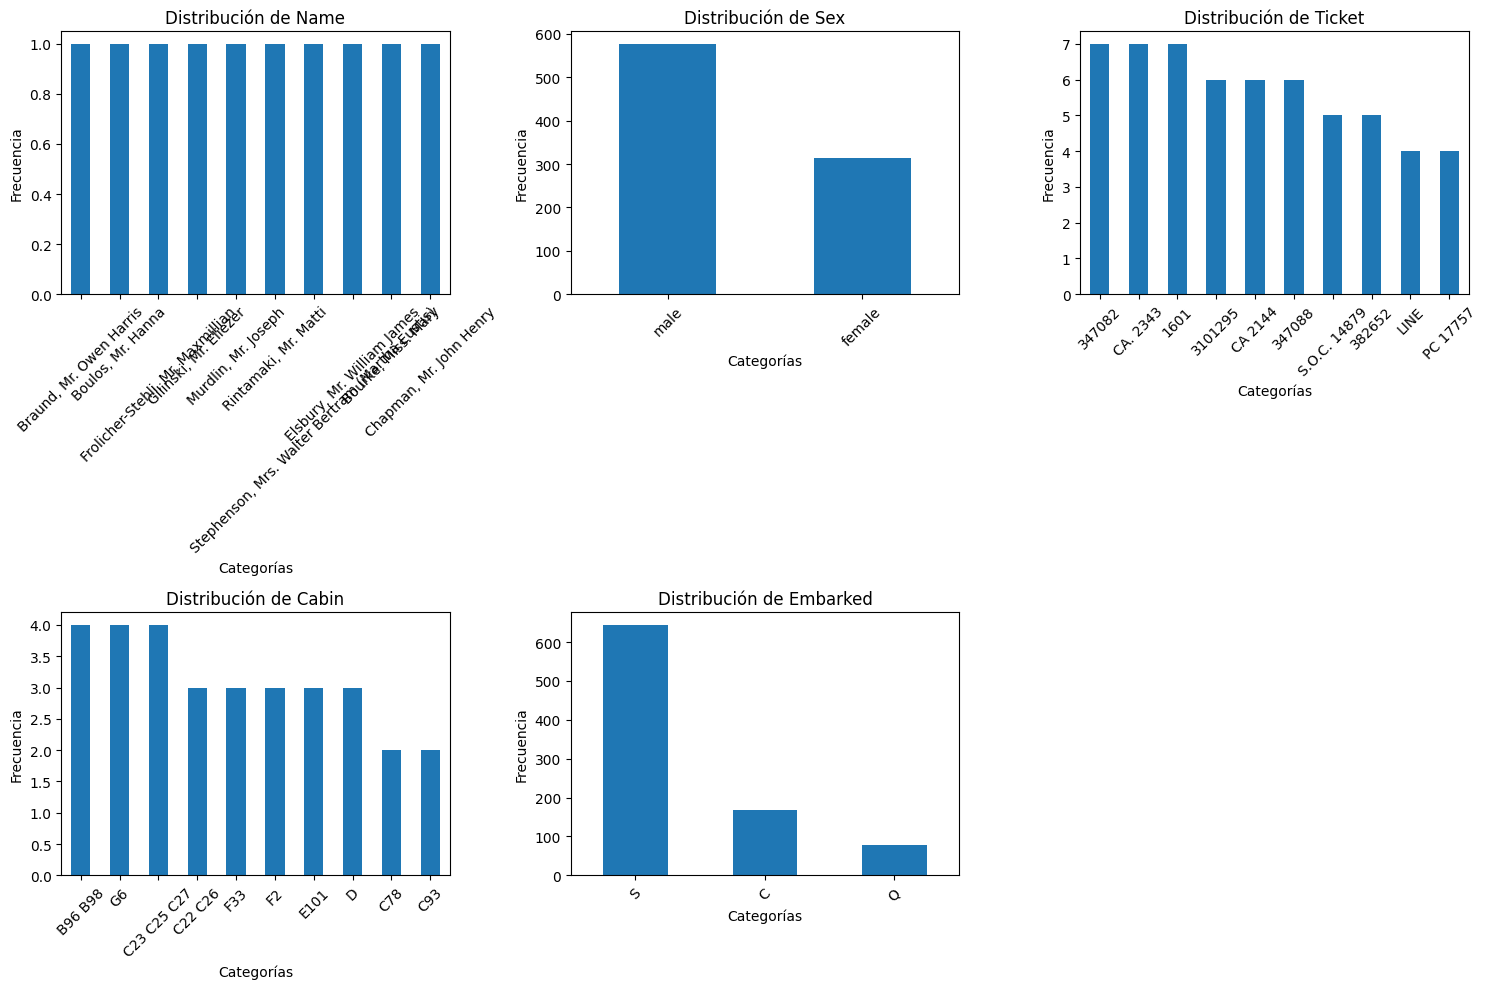

In [89]:
# Graficar la distribución de las columnas categoricas

# Seleccionar las columnas categóricas del DataFrame
categorical_columns = df.select_dtypes(include='object').columns

# Definir el tamaño de la figura y el layout de los subplots
num_columns = 3  # Número de columnas de subplots en cada fila
nrows = int(np.ceil(len(categorical_columns) / num_columns))  # Calcula el número de filas necesarias

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(nrows=nrows, ncols=num_columns, figsize=(15, nrows * 5))

# Aplanar los ejes en caso de que haya múltiples filas y columnas
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Generar gráficos de barras en cada subplot
for i, column in enumerate(categorical_columns):
    ax = axes[i]  # Seleccionar el eje correspondiente
    df[column].value_counts().nlargest(10).plot(kind='bar', ax=ax)
    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel('Categorías')
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas

# Eliminar subplots vacíos si hay menos columnas categóricas que subplots
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])  # Eliminar ejes no utilizados

# Ajustar espacio entre gráficos
plt.tight_layout()
plt.show()


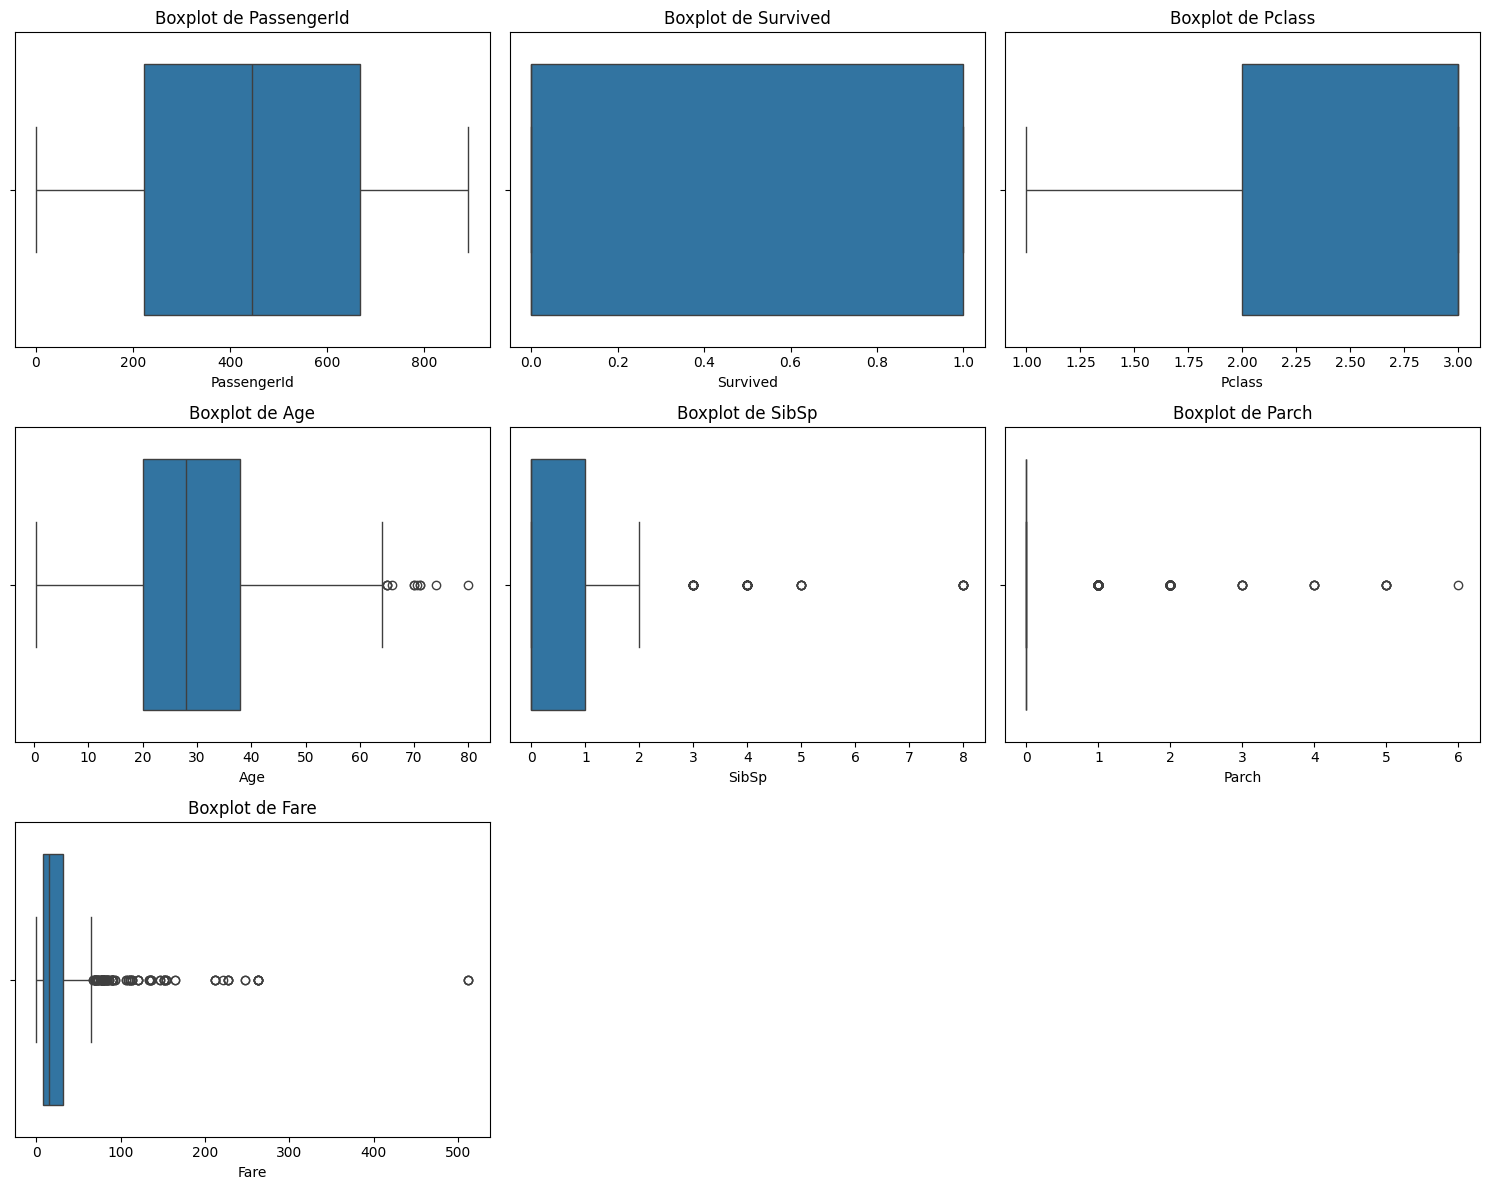

In [90]:
# Boxplots para detectar outliers en columnas numéricas

# Selecciona las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define el tamaño de la figura y el layout de los subplots
n_cols = 3  # Número de columnas de subplots en cada fila
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calcula el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Ajusta el tamaño de la figura

# Genera un boxplot en cada subplot
for i, column in enumerate(numeric_columns):
    row = i // n_cols  # Fila del subplot
    col = i % n_cols   # Columna del subplot
    sns.boxplot(data=df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot de {column}")

# Oculta cualquier subplot vacío si hay menos columnas que el número de subplots disponibles
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [91]:
# Detectar valores atípicos (outliers) con el rango intercuartil (IQR)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Un valor se considera atípico si está por debajo de (Q1 - 1.5 * IQR) o por encima de (Q3 + 1.5 * IQR).
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"\n{column} - Número de outliers: {outliers.shape[0]}")



PassengerId - Número de outliers: 0

Survived - Número de outliers: 0

Pclass - Número de outliers: 0

Age - Número de outliers: 11

SibSp - Número de outliers: 46

Parch - Número de outliers: 213

Fare - Número de outliers: 116


<Axes: >

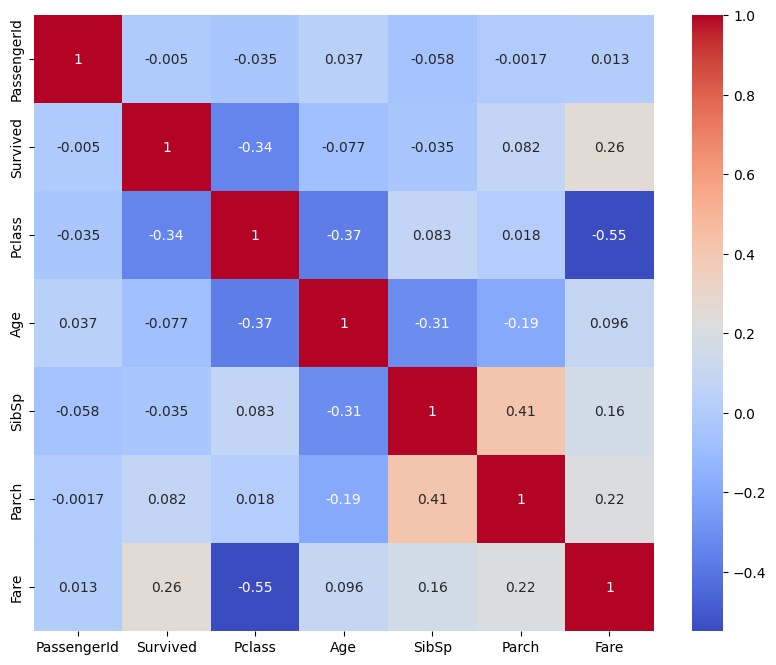

In [92]:
# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_cols = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_cols.corr()

# Gráfico de matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")  # Visualiza la matriz de correlación en un heatmap.

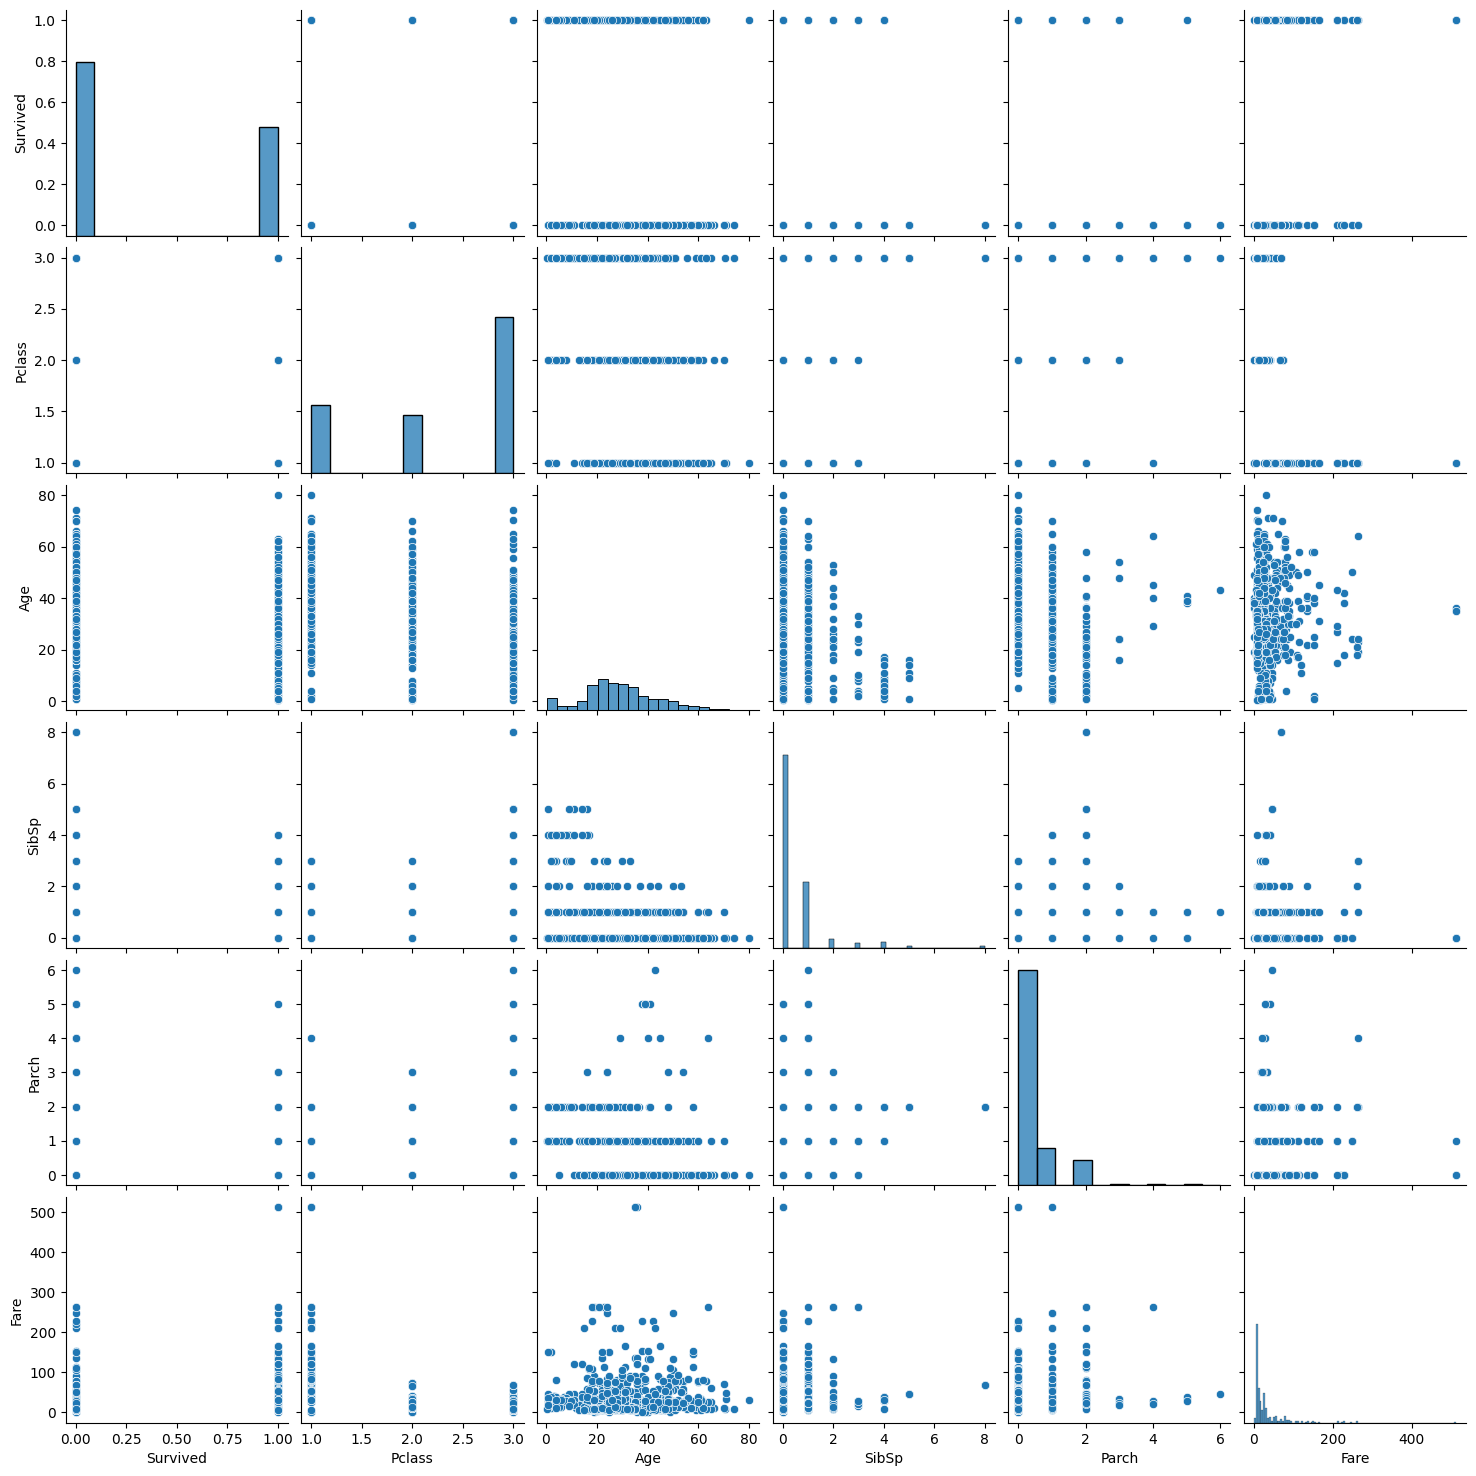

In [93]:
# Distribución por pares de variables (usando un pairplot)

# Paso 1: Filtra las variables que tienen una correlación alta (por ejemplo, superior a 0.6 en valor absoluto) Se debe ajustar segun necesidad
threshold = 0.2
high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1)]

# Paso 2: Selecciona solo las columnas con alta correlación
correlated_vars = high_corr_pairs.dropna(how='all', axis=1).columns

# Paso 3: Genera el pairplot solo para las variables con correlación significativa
sns.pairplot(df[correlated_vars]) # Muestra gráficos de dispersión y distribuciones univariadas para todas las variables numéricas

In [96]:
df = df.dropna()  # Asigna el resultado de nuevo a df

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar el dataframe (df) como en tu código anterior.
# Asegúrate de que 'Survived' sea la columna objetivo.

# Seleccionar características y objetivo
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = pd.get_dummies(df[features], drop_first=True) # One-hot encoding para variables categóricas
y = df['Survived']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model_before = LogisticRegression(max_iter=1000)  # Aumentar max_iter si es necesario
model_before.fit(X_train, y_train)

# Predecir y evaluar
y_pred_before = model_before.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)
print(f"Precisión antes de la ingeniería de características: {accuracy_before}")

Precisión antes de la ingeniería de características: 0.7567567567567568


In [98]:
#Ingenieria de caracteristicas para agregar nuevas columnas
df['TamanoFlia'] = df['SibSp'] + df['Parch'] + 1

# 2. IsAlone: Indicate if the passenger was alone
df['Solitario'] = 0
df.loc[df['TamanoFlia'] == 1, 'Solitario'] = 1

# 3. Title: Extract titles from names
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TamanoFlia,Solitario,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1,Mr
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,3,0,Miss
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,1,Miss


In [99]:
# Seleccionar características (incluyendo las nuevas)
features_after = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'TamanoFlia', 'Solitario', 'Title']
X_after = pd.get_dummies(df[features_after], drop_first=True)
y_after = df['Survived']

# Dividir en conjuntos de entrenamiento y prueba
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(X_after, y_after, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model_after = LogisticRegression(max_iter=1000)
model_after.fit(X_train_after, y_train_after)

# Predecir y evaluar
y_pred_after = model_after.predict(X_test_after)
accuracy_after = accuracy_score(y_test_after, y_pred_after)
print(f"Precisión después de la ingeniería de características: {accuracy_after}")

Precisión después de la ingeniería de características: 0.7837837837837838


In [100]:
print(f"Precisión antes de la ingeniería de características: {accuracy_before}")
print(f"Precisión después de la ingeniería de características: {accuracy_after}")

# Calcular la diferencia en la precisión
diff = accuracy_after - accuracy_before
print(f"Diferencia en la precisión: {diff}")

# Imprimir una conclusión simple
if diff > 0:
    print("La ingeniería de características mejoró la precisión del modelo.")
else:
    print("La ingeniería de características no mejoró la precisión del modelo (o la empeoró).")

Precisión antes de la ingeniería de características: 0.7567567567567568
Precisión después de la ingeniería de características: 0.7837837837837838
Diferencia en la precisión: 0.027027027027026973
La ingeniería de características mejoró la precisión del modelo.


In [102]:
# Obtener la importancia de las características
importances = model_after.coef_[0]
feature_names = X_train_after.columns

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Característica': feature_names, 'Importancia': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Imprimir la importancia de las características
print(feature_importance_df)

   Característica  Importancia
10      Title_Mrs     0.465306
8      Title_Miss     0.285638
2            Fare     0.003112
1             Age    -0.024270
4       Solitario    -0.263566
11     Title_Rare    -0.387697
3      TamanoFlia    -0.412010
7      Embarked_S    -0.532369
6      Embarked_Q    -0.543722
0          Pclass    -0.629170
5        Sex_male    -1.002308
9        Title_Mr    -1.641674


## CONCLUSION

Mejores características: Title_Mrs, Title_Miss, y Fare son las características más importantes y tienen un impacto positivo en la predicción de supervivencia. Title_Mrs es la que tiene el mayor impacto. Esto indica que las mujeres, especialmente las casadas y las solteras, tenían mayor probabilidad de sobrevivir.

Peores características: Title_Mr, Sex_male, Pclass, y Embarked_Q son las que tienen mayor impacto negativo en la predicción de supervivencia. Title_Mr tiene el mayor impacto negativo. Esto significa que los hombres, especialmente los adultos, tenían menor probabilidad de sobrevivir, al igual que los pasajeros de tercera clase y los que embarcaron en Queenstown.

Impacto de las nuevas características: Las nuevas características TamanoFlia, Solitario y Title tuvieron un impacto mixto. Title_Mrs, Title_Miss y Title_Rare tuvieron un impacto significativo en la predicción, mientras que TamanoFlia y Solitario tuvieron un impacto moderado.

En general, las características relacionadas con el género y el título social fueron las más importantes para la predicción de supervivencia, seguidas por la clase del pasajero y el lugar de embarque. Las nuevas características agregadas, especialmente aquellas relacionadas con el título social, mejoraron la capacidad del modelo para predecir la supervivencia.